# Boosted Decision Tree Classifier

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
import mltools.linear
import mltools.transforms as xform

np.random.seed(0)
%matplotlib inline

In [102]:
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X,Y)

In [3]:
X.shape

(200000, 14)

In [4]:
Y.shape

(200000,)

In [7]:
# Xs, Ys = X[:2000], Y[:2000]
# Xtr, Xva, Ytr, Yva = ml.splitData(Xs,Ys, .75)
Xtr, Xva, Ytr, Yva = ml.splitData(X,Y, .75)

In [58]:
boosts = []
n_boosts = 100

Ytr_ = np.copy(Ytr)  # We're going to copy the data into a new variable.

for i in range(n_boosts):
    tree = ml.dtree.treeRegress(Xtr, Ytr_, maxDepth=1)
    boosts.append(tree)
    # Now "learning" from our mistakes.
    Ytr_ -= tree.predict(Xtr)

In [59]:
class BoostedTree(ml.base.classifier):
    def __init__(self, learners):
        self.learners = learners
    
    def predict(self, X):
        preds = [self.learners[l].predict(X) for l in range(len(self.learners))]
        return np.sum(preds, axis=0)

In [63]:
train_auc = np.zeros((99))
validation_auc = np.zeros((99))
for i in range(0,99):
    bt = BoostedTree(boosts[:i+1])
    bt.classes = np.unique(Y)
    train_auc[i] = bt.auc(Xtr, Ytr)
    validation_auc[i] = bt.auc(Xva, Yva)

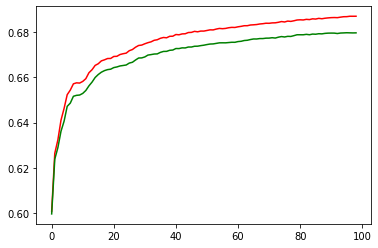

In [64]:
plt.plot(train_auc,'r-',validation_auc,'g-')
plt.show()

In [65]:
print(validation_auc[-5])
print(validation_auc[-1])

0.6796103320494208
0.6796342661892174


In [ ]:
# Create the data for submission by taking the P(Y=1) column from probs and just add a running index as the first column.
Y_sub = np.vstack([np.arange(Xte.shape[0]), probs[:, 1]]).T

# We specify the header (ID, Prob1) and also specify the comments as '' so the header won't be commented out with
# the # sign.
np.savetxt('data/Y_sub.txt', Y_sub, '%d, %.5f', header='ID,Prob1', comments='', delimiter=',')

In [65]:
boosts = []
n_boosts = 20

Ytr_ = np.copy(Ytr)  # We're going to copy the data into a new variable.

for i in range(n_boosts):
    tree = ml.dtree.treeClassify(Xtr, Ytr_, maxDepth=1)
    boosts.append(tree)
    # Now "learning" from our mistakes.
    Ytr_ -= tree.predictSoft(Xtr)[:,1]

In [66]:
class BoostedTree(ml.base.classifier):
    def __init__(self, learners):
        self.learners = learners
    
    def predictSoft(self, X):
        preds = [self.learners[l].predictSoft(X) for l in range(len(self.learners))]
        return np.sum(preds, axis=0)

In [68]:
train_auc = np.zeros((19))
validation_auc = np.zeros((19))
for i in range(1,19):
    bt = BoostedTree(boosts[1:i+1])
    bt.classes = np.unique(Y)
    train_auc[i] = bt.auc(Xtr, Ytr)
    validation_auc[i] = bt.auc(Xva, Yva)

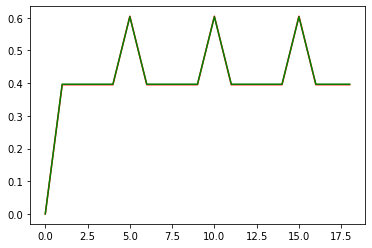

In [69]:
plt.plot(train_auc,'r-',validation_auc,'g-')
plt.show()

## Adaboost for Single-Depth Decision Tree
This is run in multiple iterations with additional boosts each time to create AUC graph

In [2]:
## TEST

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
# train_auc = np.zeros((15))
# validation_auc = np.zeros((15))
# for i in range(15):
#     bgc = GradientBoostingClassifier(n_estimators=i, max_depth=1)
#     bgc.fit(Xtr, Ytr)

In [11]:
dtree_clf = DecisionTreeClassifier(max_depth=1)

train_auc = np.zeros((20))
validation_auc = np.zeros((20))

for i,n in enumerate(range(0,100,5)):
    if n%5 == 0: print(f'{n+1} boosts...')
    ada_regr = AdaBoostClassifier(base_estimator=dtree_clf, n_estimators=n+1)
    ada_regr.fit(Xtr, Ytr)
    train_auc[i] = ada_regr.score(Xtr, Ytr)
    validation_auc[i] = ada_regr.score(Xva, Yva)
#     preds = ada_regr.predict_proba(Xva)

1 boosts...
6 boosts...
11 boosts...
16 boosts...
21 boosts...
26 boosts...
31 boosts...
36 boosts...
41 boosts...
46 boosts...
51 boosts...
56 boosts...
61 boosts...
66 boosts...
71 boosts...
76 boosts...
81 boosts...
86 boosts...
91 boosts...
96 boosts...


In [21]:
train_auc = np.concatenate((train_auc, np.zeros(6)))
validation_auc = np.concatenate((validation_auc, np.zeros(6)))

for i,n in enumerate(range(100,126,5)):
    if n%5 == 0: print(f'{n+1} boosts...')
    ada_regr = AdaBoostClassifier(base_estimator=dtree_clf, n_estimators=n+1)
    ada_regr.fit(Xtr, Ytr)
    train_auc[i+20] = ada_regr.score(Xtr, Ytr)
    validation_auc[i+20] = ada_regr.score(Xva, Yva)

101 boosts...
106 boosts...
111 boosts...
116 boosts...
121 boosts...
126 boosts...


In [25]:
train_auc = np.concatenate((train_auc, np.zeros(6)))
validation_auc = np.concatenate((validation_auc, np.zeros(6)))

for i,n in enumerate(range(130,156,5)):
    if n%5 == 0: print(f'{n+1} boosts...')
    ada_regr = AdaBoostClassifier(base_estimator=dtree_clf, n_estimators=n+1)
    ada_regr.fit(Xtr, Ytr)
    train_auc[i+26] = ada_regr.score(Xtr, Ytr)
    validation_auc[i+26] = ada_regr.score(Xva, Yva)

131 boosts...
136 boosts...
141 boosts...
146 boosts...
151 boosts...
156 boosts...


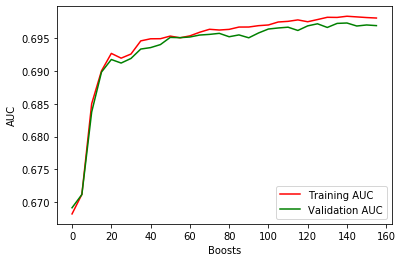

In [27]:
xrange = np.arange(0,156,5)
plt.plot(xrange,train_auc,'r-',xrange,validation_auc,'g-')
plt.xlabel('Boosts')
plt.ylabel('AUC')
plt.legend(['Training AUC', 'Validation AUC'])
plt.savefig('adaboost_auc155.png')
plt.show()

## Run 2 with Adaboost Regressor on Decision Tree
Decision tree is changed to have max depth 3 instead of 1

In [46]:
# dtree_clf2 = DecisionTreeClassifier(max_depth=3)

# train_auc2 = np.zeros((20))
# validation_auc2 = np.zeros((20))

for i,n in enumerate(range(0,101,5)):
    if n%5 == 0: print(f'{n+1} boosts...')
#     ada_regr2 = AdaBoostClassifier(base_estimator=dtree_clf2, n_estimators=n+1)
#     ada_regr2.fit(Xtr, Ytr)
#     train_auc2[i] = ada_regr2.score(Xtr, Ytr)
#     validation_auc2[i] = ada_regr2.score(Xva, Yva)
#     preds = ada_regr.predict_proba(Xva)

In [47]:
train_auc2 = np.concatenate((train_auc2, np.zeros(5)))
validation_auc2 = np.concatenate((validation_auc2, np.zeros(5)))

for i,n in enumerate(range(105,126,5)):
    if n%5 == 0: print(f'{n+1} boosts...')
    ada_regr2 = AdaBoostClassifier(base_estimator=dtree_clf2, n_estimators=n+1)
    ada_regr2.fit(Xtr, Ytr)
    train_auc2[i+21] = ada_regr2.score(Xtr, Ytr)
    validation_auc2[i+21] = ada_regr2.score(Xva, Yva)

106 boosts...
111 boosts...
116 boosts...
121 boosts...
126 boosts...


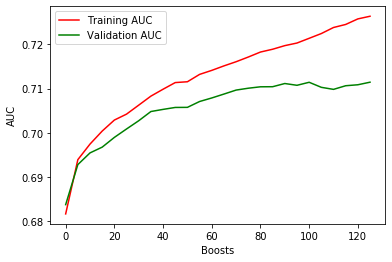

In [48]:
xrange = np.arange(0,126,5)
plt.plot(xrange,train_auc2,'r-',xrange,validation_auc2,'g-')
plt.xlabel('Boosts')
plt.ylabel('AUC')
plt.legend(['Training AUC', 'Validation AUC'])
plt.savefig('results/adaboost2_auc126.png')
plt.show()

In [50]:
print('Training AUC:')
print(train_auc2)
print('\nValidation AUC:')
print(validation_auc2)

Training AUC:
[0.68170667 0.69395333 0.69747333 0.70040667 0.70289333 0.70423333
 0.70626    0.70829333 0.70985333 0.71135333 0.71154    0.7132
 0.71410667 0.71512    0.71606    0.71712    0.71824667 0.71888
 0.71969333 0.72028    0.72134667 0.72242    0.72378667 0.72447333
 0.72572667 0.72632667]

Validation AUC:
[0.6838  0.69284 0.69548 0.69678 0.69898 0.70088 0.70274 0.70482 0.7053
 0.70574 0.70576 0.70708 0.70788 0.70876 0.70966 0.71008 0.7104  0.71042
 0.71114 0.71074 0.71142 0.71028 0.70982 0.71064 0.71086 0.71144]


## Testing with Different Splits on Data

In [53]:
X,Y = ml.shuffleData(X,Y)
Xtr, Xva, Ytr, Yva = ml.splitData(X,Y, .85)
dtree_clf3 = DecisionTreeClassifier(max_depth=3)
for n in range(100,126,5):
    print(f'{n} boosts')
    ada_regr3 = AdaBoostClassifier(base_estimator=dtree_clf3, n_estimators=n)
    ada_regr3.fit(Xtr, Ytr)
    print('\tTraining AUC:', ada_regr3.score(Xtr, Ytr))
    print('\tValidation AUC:', ada_regr3.score(Xva, Yva))

100 boosts
	Training AUC: 0.7205588235294118
	Validation AUC: 0.7145666666666667
105 boosts
	Training AUC: 0.7210470588235294
	Validation AUC: 0.7143666666666667
110 boosts
	Training AUC: 0.7222470588235295
	Validation AUC: 0.7168
115 boosts
	Training AUC: 0.7230647058823529
	Validation AUC: 0.7157
120 boosts
	Training AUC: 0.7240176470588235
	Validation AUC: 0.7168333333333333
125 boosts
	Training AUC: 0.7249
	Validation AUC: 0.7171666666666666


In [54]:
X,Y = ml.shuffleData(X,Y)
Xtr, Xva, Ytr, Yva = ml.splitData(X,Y, .90)
dtree_clf3 = DecisionTreeClassifier(max_depth=3)
for n in range(100,126,5):
    print(f'{n} boosts')
    ada_regr3 = AdaBoostClassifier(base_estimator=dtree_clf3, n_estimators=n)
    ada_regr3.fit(Xtr, Ytr)
    print('\tTraining AUC:', ada_regr3.score(Xtr, Ytr))
    print('\tValidation AUC:', ada_regr3.score(Xva, Yva))

100 boosts
	Training AUC: 0.7206222222222223
	Validation AUC: 0.7154
105 boosts
	Training AUC: 0.7212888888888889
	Validation AUC: 0.71405
110 boosts
	Training AUC: 0.7221388888888889
	Validation AUC: 0.7149
115 boosts
	Training AUC: 0.7226833333333333
	Validation AUC: 0.7145
120 boosts
	Training AUC: 0.72305
	Validation AUC: 0.71485
125 boosts
	Training AUC: 0.7236833333333333
	Validation AUC: 0.7163


## Training and Boosting with All Available Data for Submission

In [ ]:
auc_scores = np.zeros((6))

for n in range(6):
    print(f'{(n+24)*5} boosts...'))
    dtree_clf = DecisionTreeClassifier(max_depth=3)
    ada_regr = AdaBoostClassifier(base_estimator=dtree_clf, n_estimators=(n+24)*5)
    ada_regr.fit(X, Y)
    auc_scores[n] = cross_val_score(clf, X, Y, cv=5).mean()

In [76]:
Xte = np.genfromtxt('data/X_test.txt', delimiter=None)
dtree_clf = DecisionTreeClassifier(max_depth=3)
ada_regr = AdaBoostClassifier(base_estimator=dtree_clf, n_estimators=130)
ada_regr.fit(X, Y)
probs = ada_regr.predict_log_proba(Xte)

In [77]:
probs[:5]

array([[-0.6963108 , -0.68999353],
       [-0.69123815, -0.69505986],
       [-0.68796686, -0.69835448],
       [-0.55620754, -0.85186033],
       [-0.68737679, -0.69895107]])

In [60]:
ada_regr3.predict_proba(Xte)[:5]

array([[0.49736071, 0.50263929],
       [0.50049584, 0.49950416],
       [0.50340208, 0.49659792],
       [0.50737301, 0.49262699],
       [0.50261571, 0.49738429]])

In [58]:
# Create the data for submission by taking the P(Y=1) column from probs and just add a running index as the first column.
Y_sub = np.vstack([np.arange(Xte.shape[0]), probs[:, 1]]).T

# We specify the header (ID, Prob1) and also specify the comments as '' so the header won't be commented out with
# the # sign.
np.savetxt('data/Y_sub.txt', Y_sub, '%d, %.5f', header='ID,Prob1', comments='', delimiter=',')

## Gradient Boosting on Decision Tree

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [101]:
X,Y = ml.shuffleData(X,Y)
Xtr, Xva, Ytr, Yva = ml.splitData(X,Y,.75)

Max Depth 1

In [117]:
train_auc = np.zeros((35))
validation_auc = np.zeros((35))

for n in range(35):
    print(f'{(n+5)*5} boosts...')
    clf = GradientBoostingClassifier(n_estimators=(n+5)*5, max_depth=1).fit(Xtr, Ytr)
    train_auc[n] = clf.score(Xtr, Ytr)
    validation_auc[n] = clf.score(Xva, Yva)

25 boosts...
30 boosts...
35 boosts...
40 boosts...
45 boosts...
50 boosts...
55 boosts...
60 boosts...
65 boosts...
70 boosts...
75 boosts...
80 boosts...
85 boosts...
90 boosts...
95 boosts...
100 boosts...
105 boosts...
110 boosts...
115 boosts...
120 boosts...
125 boosts...
130 boosts...
135 boosts...
140 boosts...
145 boosts...
150 boosts...
155 boosts...
160 boosts...
165 boosts...
170 boosts...
175 boosts...
180 boosts...
185 boosts...
190 boosts...
195 boosts...


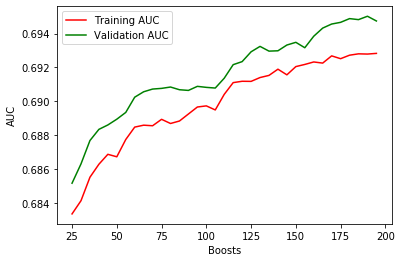

In [118]:
xrange = (np.arange(35)+5)*5
plt.plot(xrange,train_auc,'r-',xrange,validation_auc,'g-')
plt.xlabel('Boosts')
plt.ylabel('AUC')
plt.legend(['Training AUC', 'Validation AUC'])
plt.savefig('results/gradboost1_auc.png')
plt.show()

Max Depth 2

In [108]:
train_auc2 = np.zeros((25))
validation_auc2 = np.zeros((25))

for n in range(25):
    print(f'{(n+10)*5} boosts...')
    clf = GradientBoostingClassifier(n_estimators=(n+10)*5, max_depth=2).fit(Xtr, Ytr)
    train_auc2[n] = clf.score(Xtr, Ytr)
    validation_auc2[n] = clf.score(Xva, Yva)

50 boosts...
55 boosts...
60 boosts...
65 boosts...
70 boosts...
75 boosts...
80 boosts...
85 boosts...
90 boosts...
95 boosts...
100 boosts...
105 boosts...
110 boosts...
115 boosts...
120 boosts...
125 boosts...
130 boosts...
135 boosts...
140 boosts...
145 boosts...
150 boosts...
155 boosts...
160 boosts...
165 boosts...
170 boosts...


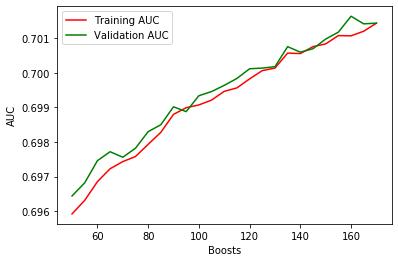

In [110]:
xrange = (np.arange(25)+10)*5
plt.plot(xrange,train_auc2,'r-',xrange,validation_auc2,'g-')
plt.xlabel('Boosts')
plt.ylabel('AUC')
plt.legend(['Training AUC', 'Validation AUC'])
plt.savefig('results/gradboost2_auc.png')
plt.show()

Max Depth 3

In [119]:
train_auc3 = np.zeros((8))
validation_auc3 = np.zeros((8))

for n in range(8):
    print(f'{(n+24)*5} boosts...')
    clf = GradientBoostingClassifier(n_estimators=(n+24)*5, max_depth=3).fit(Xtr, Ytr)
    train_auc3[n] = clf.score(Xtr, Ytr)
    validation_auc3[n] = clf.score(Xva, Yva)

120 boosts...
125 boosts...
130 boosts...
135 boosts...
140 boosts...
145 boosts...
150 boosts...
155 boosts...


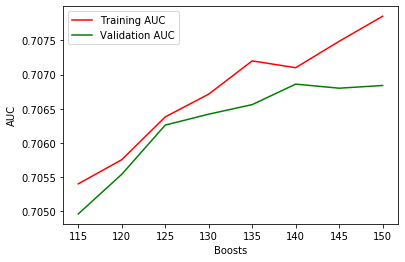

In [122]:
xrange = (np.arange(8)+23)*5
plt.plot(xrange,train_auc3,'r-',xrange,validation_auc3,'g-')
plt.xlabel('Boosts')
plt.ylabel('AUC')
plt.legend(['Training AUC', 'Validation AUC'])
plt.savefig('results/gradboost3_auc.png')
plt.show()

In [123]:
print('Training AUC:',train_auc3[5])
print('Validation AUC:',validation_auc3[5])
print('Leaderboard AUC:',0.69990)

Training AUC: 0.7071
Validation AUC: 0.70686
Leaderboard AUC: 0.6999


### Train All Data Using Cross Validation to Score Predictions

In [114]:
auc_scores = np.zeros((28))

for n in range(28):
    print(f'{(n+1)*5} boosts...')
    clf = GradientBoostingClassifier(n_estimators=(n+1)*5, max_depth=3)
    clf.fit(X, Y)
    auc_scores[n] = cross_val_score(clf, X, Y, cv=5).mean()
# probs = clf.predict_proba(Xte)

In [84]:
auc_scores

array([0.69957 , 0.70043 , 0.700645, 0.700915, 0.701105, 0.701605,
       0.701945, 0.70228 , 0.70244 , 0.70274 ])

In [86]:
auc_scores

array([0.657105, 0.680975, 0.68963 , 0.692725, 0.69414 , 0.694685,
       0.696145, 0.696875, 0.697565, 0.698745, 0.699295, 0.69972 ,
       0.69957 , 0.70043 , 0.700645, 0.700915, 0.701105, 0.701605,
       0.701945, 0.70228 , 0.70244 , 0.70274 ])

In [115]:
auc_scores

array([0.657105, 0.680975, 0.68963 , 0.692725, 0.69414 , 0.694685,
       0.696145, 0.696875, 0.697565, 0.698745, 0.699295, 0.69972 ,
       0.69957 , 0.70043 , 0.700645, 0.700915, 0.701105, 0.701605,
       0.701945, 0.70228 , 0.70244 , 0.70274 , 0.70365 , 0.703805,
       0.70416 , 0.70429 , 0.70451 , 0.70457 ])

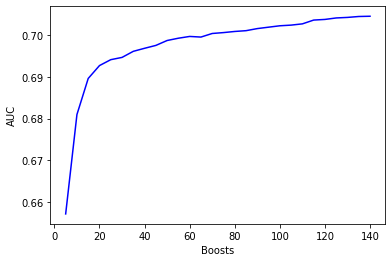

In [111]:
xrange = (np.arange(28)+1)*5
plt.plot(xrange,auc_scores,'b-')
plt.xlabel('Boosts')
plt.ylabel('AUC')
plt.savefig('results/gradboost_cross_val.png')
plt.show()

In [112]:
clf = GradientBoostingClassifier(n_estimators=140, max_depth=3).fit(X, Y)
probs = clf.predict_proba(Xte)

In [113]:
# Create the data for submission by taking the P(Y=1) column from probs and just add a running index as the first column.
Y_sub = np.vstack([np.arange(Xte.shape[0]), probs[:, 1]]).T

# We specify the header (ID, Prob1) and also specify the comments as '' so the header won't be commented out with
# the # sign.
np.savetxt('data/Y_sub.txt', Y_sub, '%d, %.5f', header='ID,Prob1', comments='', delimiter=',')